In [1]:
import pandas as pd
from google.cloud import bigquery
import csv
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.linear_model import LinearRegression,Ridge, Lasso, RidgeCV, LassoCV, LogisticRegressionCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [3]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(11, 7))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
    ax.set_ylim([df.shape[1], 0])
    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    return fig, ax



In [4]:
usdt_Aug19 = pd.read_csv('usdt_Aug19_30_min.csv')

In [5]:
usdt_Aug19['block_timestamp']= pd.to_datetime(usdt_Aug19.block_timestamp)

In [6]:
usdt_Aug19.set_index('block_timestamp', inplace=True, drop=True)

In [7]:
usdt_Aug19.head(3)

,nonce,gas,gas_price,receipt_gas_used,qty_tx,fees_wei,count_tx
block_timestamp,,,,,,,
2019-08-01 00:00:00+00:00,79022868,41737619,7338432616792,15800454,2.316602e+06,313248988339804288,415
2019-08-01 00:30:00+00:00,82064542,50634511,8263440275113,17513627,3.453344e+06,351998551360769088,460
2019-08-01 01:00:00+00:00,114958878,71129505,13790452616747,27441673,8.624771e+06,604623633279762432,703


In [8]:
usdt_Aug19.describe()

,nonce,gas,gas_price,receipt_gas_used,qty_tx,fees_wei,count_tx
count,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1488.000000
mean,2.065494e+08,1.307902e+08,2.418891e+13,5.677553e+07,1.007663e+07,9.084100e+17,1428.140457
std,1.272431e+08,1.320794e+08,2.393377e+13,6.454150e+07,8.668320e+06,2.239222e+18,1582.647096
min,1.672877e+07,8.799897e+06,1.347080e+12,3.092082e+06,2.553049e+05,-8.974537e+18,82.000000
25%,1.028123e+08,5.046465e+07,7.696835e+12,1.806995e+07,4.364289e+06,2.353497e+17,501.000000
50%,1.947852e+08,1.071708e+08,2.027900e+13,4.241360e+07,8.465146e+06,8.562178e+17,1067.500000
75%,2.814623e+08,1.517037e+08,2.858494e+13,6.026598e+07,1.348549e+07,1.318015e+18,1521.750000
max,1.382827e+09,1.539230e+09,2.029567e+14,5.677040e+08,1.102470e+08,9.208155e+18,14329.000000


In [9]:
plt

<module 'matplotlib.pyplot' from '/Users/riccardoanacar/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [10]:
btc_Aug19 = pd.read_csv('btc_Aug19_30_min.csv')

In [11]:
btc_Aug19['block_timestamp']= pd.to_datetime(btc_Aug19.block_timestamp)

In [12]:
btc_Aug19.set_index('block_timestamp', inplace=True, drop=True)

In [13]:
btc_Aug19

,input_value,btc_qty
block_timestamp,,
2019-08-01 00:00:00+00:00,1.654180e+12,16541.800976
2019-08-01 00:30:00+00:00,1.536837e+12,15368.372194
2019-08-01 01:00:00+00:00,1.500655e+12,15006.547402
2019-08-01 01:30:00+00:00,2.498528e+12,24985.282271
2019-08-01 02:00:00+00:00,1.673637e+12,16736.369033
2019-08-01 02:30:00+00:00,1.084322e+12,10843.217191
2019-08-01 03:00:00+00:00,6.000135e+11,6000.134996
2019-08-01 03:30:00+00:00,3.760703e+12,37607.031633
2019-08-01 04:00:00+00:00,3.711866e+12,37118.661094


In [244]:
btc_Aug19.drop(['input_value'], axis =1, inplace  = True)

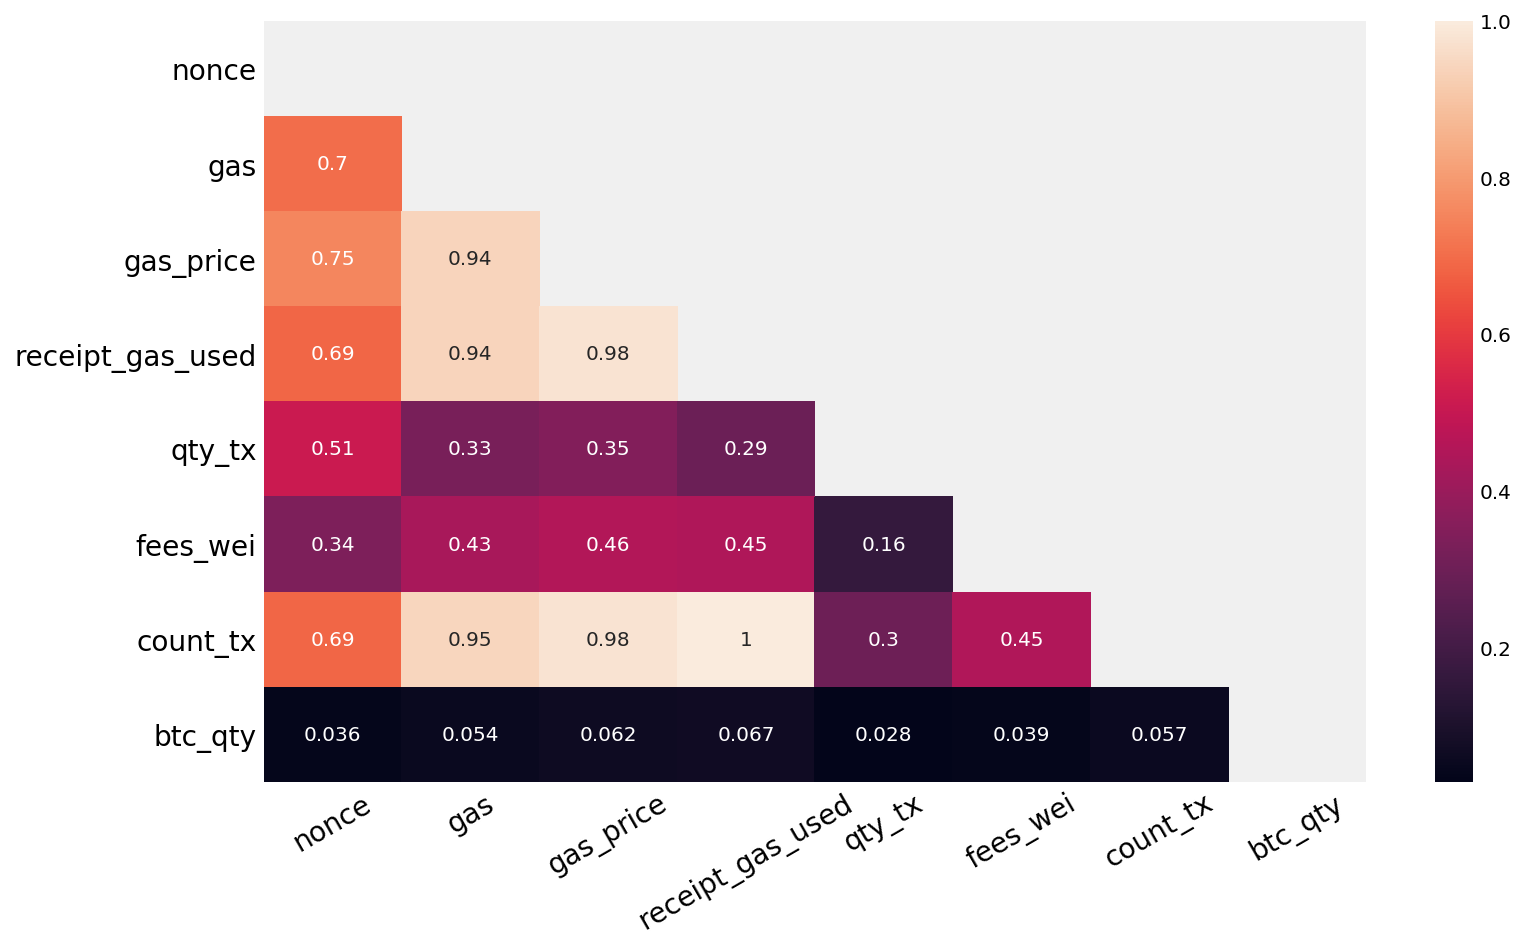

In [245]:
df_with_target = usdt_Aug19.copy()
df_with_target['btc_qty'] = btc_Aug19

fig, ax = correlation_heat_map(df_with_target)

In [246]:
btc_Aug19.mean()

btc_qty    50661.643616
dtype: float64

In [247]:
y = btc_Aug19

In [248]:
# Baseline
y.mean()

btc_qty    50661.643616
dtype: float64

In [249]:
X = usdt_Aug19

In [250]:
# Baseline
X.mean().mean()

1.297763179963733e+17

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1041, 7) (1041, 1)
(447, 7) (447, 1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2c8e7898>,
      dtype=object)

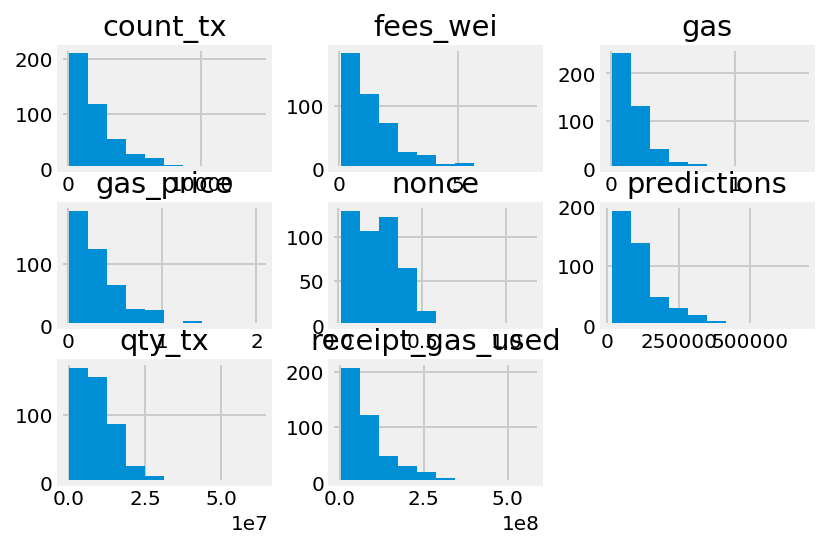

In [231]:
X_test.hist()

In [232]:
X_test.std()

nonce               1.485620e+08
gas                 1.962147e+08
gas_price           3.416997e+13
receipt_gas_used    9.268774e+07
qty_tx              7.079972e+06
fees_wei            1.384782e+18
count_tx            2.306768e+03
predictions         1.017233e+05
dtype: float64

### Standardization

In [ ]:
power = PowerTransformer()
Xstd_train_pt = pd.DataFrame(power.fit_transform(Xstd_train), columns=Xstd_train.columns, index=Xstd_train.index)


In [253]:
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)
#X_val_pt = pt.transform(X_val)

/Users/riccardoanacar/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2863: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/riccardoanacar/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [254]:
scaler = StandardScaler()
Xstd_train = pd.DataFrame(scaler.fit_transform(X_train_pt))
Xstd_test = pd.DataFrame(scaler.transform(X_test_pt))

In [99]:

Xstd_train = scaler.fit_transform(X_train)
Xstd_test = scaler.transform(X_test)

### Linear Regression

In [233]:
print(Xstd_train.mean().mean())
print(Xstd_test.mean().mean())
print(y_train.mean())
print(y_test.mean())

-5.2147104144679373e-17
0.7505057580778248
btc_qty    65359.694752
dtype: float64
btc_qty    16431.954059
dtype: float64


In [255]:
print(Xstd_train_pt.mean().mean())
print(Xstd_test_pt.mean().mean())
print(y_train.mean())
print(y_test.mean())

5.850495971676412e-18
0.26335393661699497
btc_qty    65359.694752
dtype: float64
btc_qty    16431.954059
dtype: float64


In [234]:
# create a linear regression model instance
model_lr = LinearRegression()
model_lr.fit(Xstd_train, y_train)
scores_std = cross_val_score(model_lr, Xstd_train, y_train, cv=5)


print("Cross-validated training scores:", scores_std)
print("Mean cross-validated training score:", scores_std.mean())

print("Training Score:", model_lr.score(Xstd_train, y_train))
# evaluate the data on the test set
print("Test Score:", model_lr.score(Xstd_test, y_test))

Cross-validated training scores: [-23.83197841  -1.29374292 -12.35011347  -5.52630557  -0.47929258]
Mean cross-validated training score: -8.696286589338317
Training Score: 0.07637111498313509
Test Score: -88.92570154865287


In [256]:
# create a linear regression model instance
model_lr = LinearRegression()
model_lr.fit(Xstd_train_pt, y_train)
scores_std = cross_val_score(model_lr, Xstd_train_pt, y_train, cv=5)


print("Cross-validated training scores:", scores_std)
print("Mean cross-validated training score:", scores_std.mean())

print("Training Score:", model_lr.score(Xstd_train_pt, y_train))
# evaluate the data on the test set
print("Test Score:", model_lr.score(Xstd_test_pt, y_test))

Cross-validated training scores: [-30.81468272  -1.82268995 -14.4392437   -6.66272423  -0.49516964]
Mean cross-validated training score: -10.846902046821466
Training Score: 0.0404998355610251
Test Score: -39.91732831309489


In [124]:
Xstd_train.columns.tolist()

[0, 1, 2, 3, 4, 5, 6]

In [125]:
model_lr.coef_

array([[ -6334.60498866,    -95.74884148, -38066.27940433,
         70209.09160205,  -8194.04410182,   1736.83284885,
         11230.85396216]])

In [126]:
df_coef = pd.DataFrame(model_lr.coef_.T, index=Xstd_train.columns.tolist(),
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef

,coefficients,coef_abs
0,-6334.604989,6334.604989
1,-95.748841,95.748841
2,-38066.279404,38066.279404
3,70209.091602,70209.091602
4,-8194.044102,8194.044102
5,1736.832849,1736.832849
6,11230.853962,11230.853962


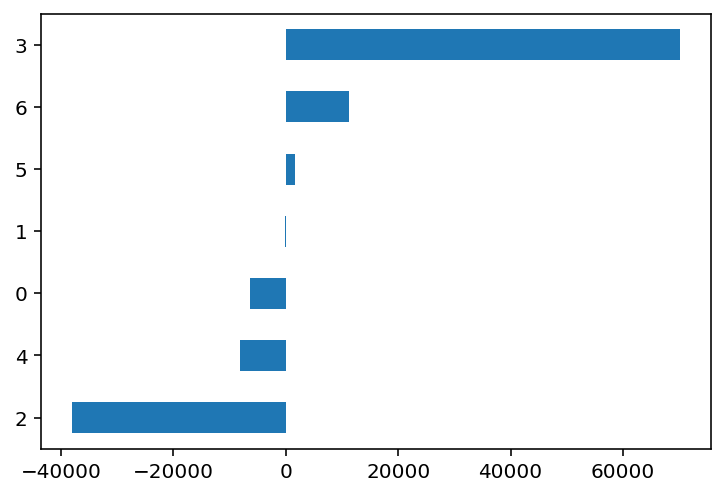

In [127]:
# plot the magnitude of the coefficients
df_coef['coefficients'].sort_values().plot(kind='barh');

###  Ridge model instance

In [128]:
# Ridge model instance
#ridge_alphas = np.logspace(0, 5, 200)

model_rg = RidgeCV(alphas=np.logspace(0, 5, 200), cv=10)

model_rg.fit(Xstd_train, y_train)
scores_rg = cross_val_score(model_rg, Xstd_train, y_train, cv=10)

print('Alpha:', model_rg.alpha_)
print("Cross-validated training scores:", scores_rg)
print("Mean cross-validated training score:", scores_rg.mean())
# fit and evaluate the data on the whole training set

print("Training Score:", model_rg.score(Xstd_train, y_train))
# evaluate the data on the test set
print("Test Score:", model_rg.score(Xstd_test, y_test))

/Users/riccardoanacar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/riccardoanacar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/riccardoanacar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/riccardoanacar/anaconda3/lib/python3

Alpha: 7401.959996915644
Cross-validated training scores: [-12.29555602 -27.97462572  -0.53618554  -2.06030983  -3.65910439
  -9.56169722  -3.3614991   -4.75583924 -90.56331743  -2.11776288]
Mean cross-validated training score: -15.688589735517926
Training Score: 0.033152231561890955
Test Score: -20.036226151034306


/Users/riccardoanacar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [260]:
# Ridge model instance
#ridge_alphas = np.logspace(0, 5, 200)

model_rg = RidgeCV(alphas=np.logspace(0, 5, 200), cv=10)

model_rg.fit(Xstd_train_pt, y_train)
scores_rg = cross_val_score(model_rg, Xstd_train_pt, y_train, cv=10)

print('Alpha:', model_rg.alpha_)
print("Cross-validated training scores:", scores_rg)
print("Mean cross-validated training score:", scores_rg.mean())
# fit and evaluate the data on the whole training set

print("Training Score:", model_rg.score(Xstdpower_train, y_train))
# evaluate the data on the test set
print("Test Score:", model_rg.score(Xstd_test_pt, y_test))

/Users/riccardoanacar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/riccardoanacar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/riccardoanacar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/riccardoanacar/anaconda3/lib/python3

Alpha: 4659.525668664682
Cross-validated training scores: [-19.1152964  -36.37510206  -1.42454751  -3.84724321  -4.72750585
  -7.55031774  -3.61393114  -4.17264831 -17.2229655   -2.11338742]
Mean cross-validated training score: -10.016294513924041
Training Score: 0.01178589683618192
Test Score: -11.91396555174961


/Users/riccardoanacar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [130]:
power = PowerTransformer()
Xstdpower_train = pd.DataFrame(power.fit_transform(Xstd_train), columns=Xstd_train.columns, index=Xstd_train.index)



In [131]:
# Ridge model instance
#ridge_alphas = np.logspace(0, 5, 200)

model_rg = RidgeCV(alphas=np.logspace(0, 5, 200), cv=10)

model_rg.fit(Xstdpower_train, y_train)
scores_rg = cross_val_score(model_rg, Xstdpower_train, y_train, cv=10)

print('Alpha:', model_rg.alpha_)
print("Cross-validated training scores:", scores_rg)
print("Mean cross-validated training score:", scores_rg.mean())
# fit and evaluate the data on the whole training set

print("Training Score:", model_rg.score(Xstdpower_train, y_train))
# evaluate the data on the test set
#print("Test Score:", model_rg.score(Xstd_test, y_test))

/Users/riccardoanacar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/riccardoanacar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/riccardoanacar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/riccardoanacar/anaconda3/lib/python3

Alpha: 8309.941949353395
Cross-validated training scores: [-19.5936777  -35.95050867  -1.56058883  -4.10489204  -4.74912736
  -6.72615825  -3.52488081  -4.2867387  -18.45363234  -2.11788923]
Mean cross-validated training score: -10.106809391710598
Training Score: 0.01213332537042877


/Users/riccardoanacar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [132]:
power_target = PowerTransformer()
ypower_train = power_target.fit_transform(y_train.values)

In [152]:
power_target.inverse_transform(ypower_train)

array([[ 16541.80097553],
       [ 15368.37219397],
       [ 15006.5474021 ],
       ...,
       [141302.51000142],
       [ 91522.63044645],
       [204721.97789184]])

(array([ 46.,   0.,  12., 270., 433., 181.,  17.,  21.,  37.,  24.]),
 array([-2.76225748, -2.15350488, -1.54475228, -0.93599969, -0.32724709,
         0.28150551,  0.89025811,  1.49901071,  2.10776331,  2.71651591,
         3.32526851]),
 <a list of 10 Patch objects>)

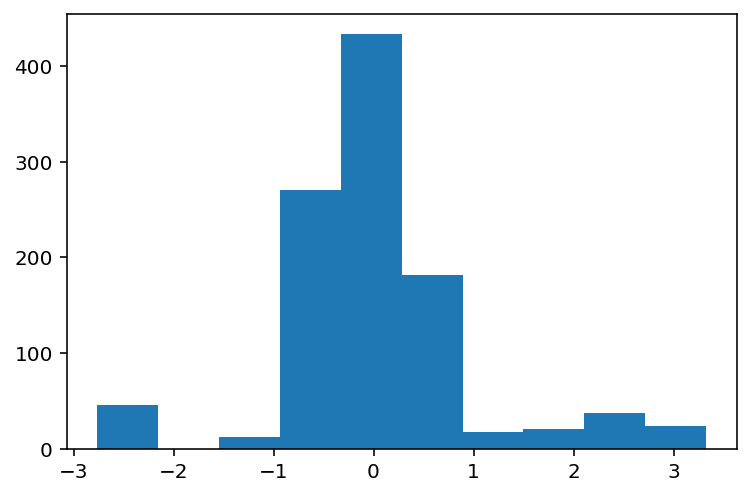

In [133]:
plt.hist(ypower_train)

In [134]:
X_current = Xstdpower_train.copy()
X_current['target'] = ypower_train
X_current.corr()

,0,1,2,3,4,5,6,target
0,1.000000,0.837046,0.871704,0.842552,0.751993,0.199597,0.833123,0.125277
1,0.837046,1.000000,0.969136,0.985030,0.717527,0.252968,0.991253,0.157330
2,0.871704,0.969136,1.000000,0.977974,0.716256,0.260532,0.971747,0.148418
3,0.842552,0.985030,0.977974,1.000000,0.705703,0.248857,0.994579,0.165951
4,0.751993,0.717527,0.716256,0.705703,1.000000,0.161064,0.712515,0.081167
5,0.199597,0.252968,0.260532,0.248857,0.161064,1.000000,0.253422,0.059831
6,0.833123,0.991253,0.971747,0.994579,0.712515,0.253422,1.000000,0.163028
target,0.125277,0.157330,0.148418,0.165951,0.081167,0.059831,0.163028,1.000000


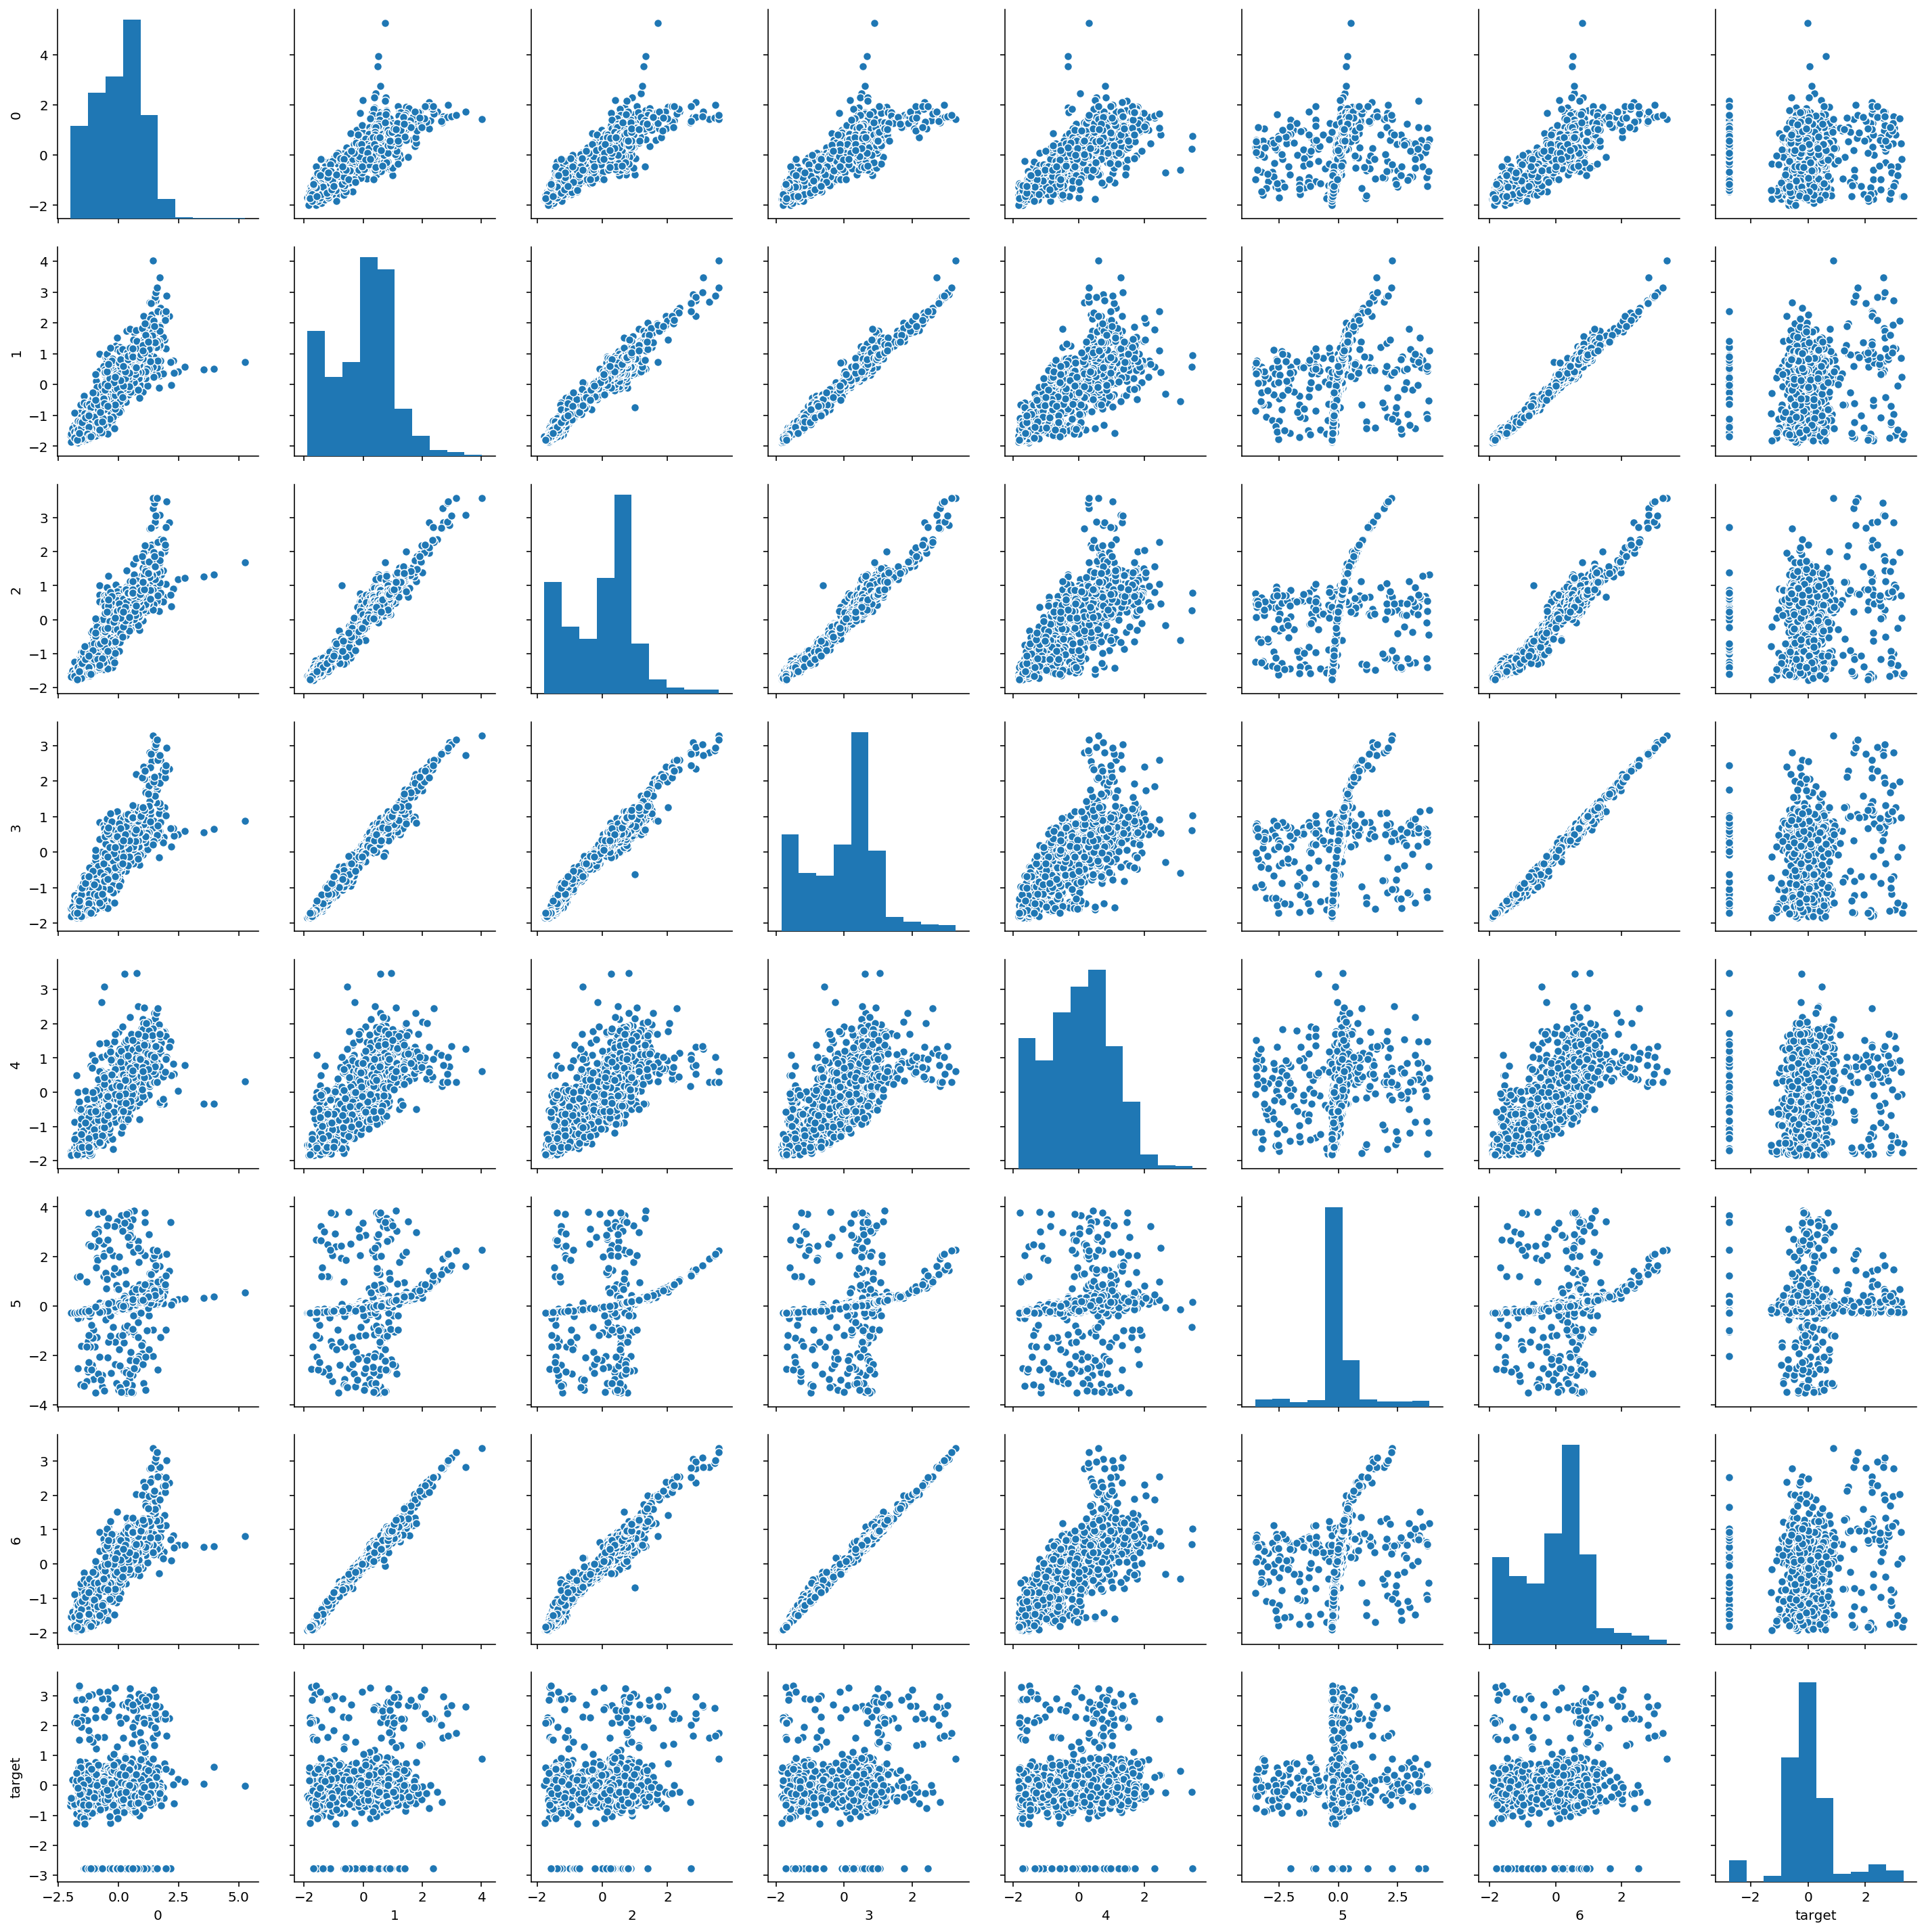

In [135]:
sns.pairplot(X_current);

In [136]:
y_train

,btc_qty
block_timestamp,
2019-08-01 00:00:00+00:00,16541.800976
2019-08-01 00:30:00+00:00,15368.372194
2019-08-01 01:00:00+00:00,15006.547402
2019-08-01 01:30:00+00:00,24985.282271
2019-08-01 02:00:00+00:00,16736.369033
2019-08-01 02:30:00+00:00,10843.217191
2019-08-01 03:00:00+00:00,6000.134996
2019-08-01 03:30:00+00:00,37607.031633
2019-08-01 04:00:00+00:00,37118.661094


In [137]:
Xstd_train.head()

,0,1,2,3,4,5,6
0,-1.002309,-0.801325,-0.776971,-0.668155,-0.872229,-0.147571,-0.701155
1,-0.975775,-0.686552,-0.717777,-0.624893,-0.749324,-0.131967,-0.652524
2,-0.688822,-0.422158,-0.364085,-0.374183,-0.190185,-0.030236,-0.389921
3,-0.577072,-0.252689,-0.197667,-0.225034,-0.170749,0.013430,-0.225659
4,-0.241391,0.007254,0.252515,0.030353,0.763060,0.141299,-0.007363


In [138]:
X_train.head()

,nonce,gas,gas_price,receipt_gas_used,qty_tx,fees_wei,count_tx
block_timestamp,,,,,,,
2019-08-01 00:00:00+00:00,79022868,41737619,7338432616792,15800454,2.316602e+06,313248988339804288,415
2019-08-01 00:30:00+00:00,82064542,50634511,8263440275113,17513627,3.453344e+06,351998551360769088,460
2019-08-01 01:00:00+00:00,114958878,71129505,13790452616747,27441673,8.624771e+06,604623633279762432,703
2019-08-01 01:30:00+00:00,127769155,84266259,16390997430573,33347968,8.804536e+06,713058130110667776,855
2019-08-01 02:00:00+00:00,166249301,104416273,23425837541222,43461209,1.744125e+07,1030593915754249344,1057


In [ ]:
## First PowerTrasform then Stdandardization 

In [139]:
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)
#X_val_pt = pt.transform(X_val)

/Users/riccardoanacar/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2863: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/riccardoanacar/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [140]:

Xstd_train_pt = scaler.fit_transform(X_train_pt)
Xstd_test_pt = scaler.transform(X_test_pt)

In [261]:
## RANDOM FOREST AND BAGG\
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn import metrics

In [262]:
regressor = RandomForestRegressor(n_estimators=300, random_state=1, max_depth=None ,oob_score=True)
regressor.fit(Xstd_train_pt, y_train)
y_pred = regressor.predict(Xstd_test_pt)

/Users/riccardoanacar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [263]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(regressor.score(Xstd_test_pt, y_test))

Mean Absolute Error: 152979.16902748865
Mean Squared Error: 35381185824.473434
Root Mean Squared Error: 188098.8724699684
-136.35337120173497


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2cc8c4a8>]],
      dtype=object)

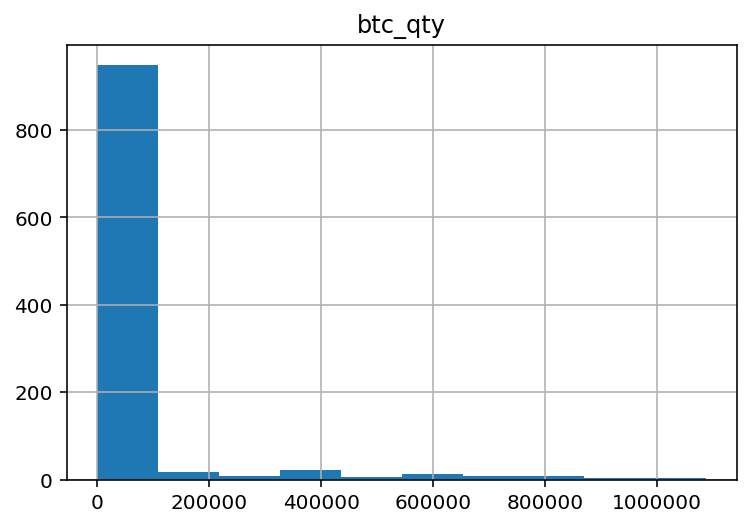

In [151]:
y_train.hist()

In [146]:
y_test

,btc_qty,btc_pred
block_timestamp,,
2019-08-22 16:30:00+00:00,74586.305589,167446.712105
2019-08-22 17:00:00+00:00,73542.603219,37335.881945
2019-08-22 17:30:00+00:00,18233.588973,14217.213734
2019-08-22 18:00:00+00:00,12545.898003,87200.897122
2019-08-22 18:30:00+00:00,5210.150606,89833.512749
2019-08-22 19:00:00+00:00,23777.595192,15185.542326
2019-08-22 19:30:00+00:00,14330.729293,70452.382681
2019-08-22 20:00:00+00:00,7173.071078,132218.850079
2019-08-22 20:30:00+00:00,13041.532610,161904.850168


## CrossValiation and TimeSeriesSplit

In [192]:
model = LinearRegression()
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [175]:
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.07634501789102077
-86.74824135900157


In [169]:
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

ts = TimeSeriesSplit(n_splits=3)

splits = [(tr, te) for (tr, te) in ts.split(usdt_Aug19)]
splits

[(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
          13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
          26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
          39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
          52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
          65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
          78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
          91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
         104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
         117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
         130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
         143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
         156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
         169, 170, 171, 172, 173, 174,

In [170]:
tr= X

In [173]:
scores = cross_val_score(model, tr, y, cv=ts)
print(scores)
print(scores.mean())

[-115.72934341   -0.21105591  -37.27410402]
-51.07150111344141


In [264]:
Xstd_train.mean().mean()

-8.730036957735895e-18

In [176]:
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

In [177]:
X['predictions'] = np.concatenate([predictions_train, predictions_test])

In [196]:
X

,nonce,gas,gas_price,receipt_gas_used,qty_tx,fees_wei,count_tx,predictions
block_timestamp,,,,,,,,
2019-08-01 00:00:00+00:00,79022868,41737619,7338432616792,15800454,2.316602e+06,313248988339804288,415,53528.247253
2019-08-01 00:30:00+00:00,82064542,50634511,8263440275113,17513627,3.453344e+06,351998551360769088,460,53835.389395
2019-08-01 01:00:00+00:00,114958878,71129505,13790452616747,27441673,8.624771e+06,604623633279762432,703,54630.937927
2019-08-01 01:30:00+00:00,127769155,84266259,16390997430573,33347968,8.804536e+06,713058130110667776,855,59696.515837
2019-08-01 02:00:00+00:00,166249301,104416273,23425837541222,43461209,1.744125e+07,1030593915754249344,1057,53893.853219
2019-08-01 02:30:00+00:00,150685747,113199971,22633618677911,47434649,8.684461e+06,988892942956243712,1152,72540.249489
2019-08-01 03:00:00+00:00,158926696,124567857,25012200302400,54754353,6.255505e+06,1122216872500323200,1305,83469.243011
2019-08-01 03:30:00+00:00,199589420,131257884,24212655702246,51376301,6.812235e+06,1077497276670899712,1221,76030.704551
2019-08-01 04:00:00+00:00,154712960,117112187,18616989198520,45702326,6.362151e+06,824008300990875264,1102,80591.164573


/Users/riccardoanacar/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


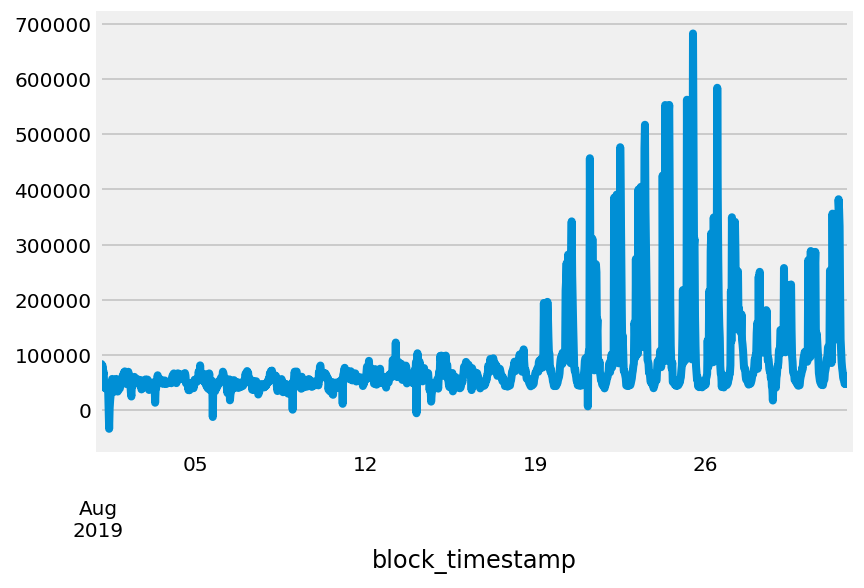

In [223]:
X['predictions'].plot()

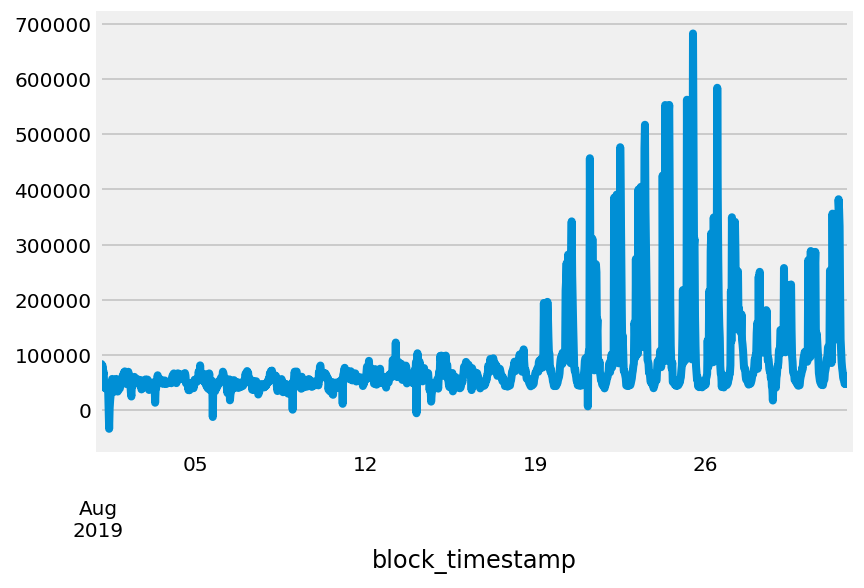

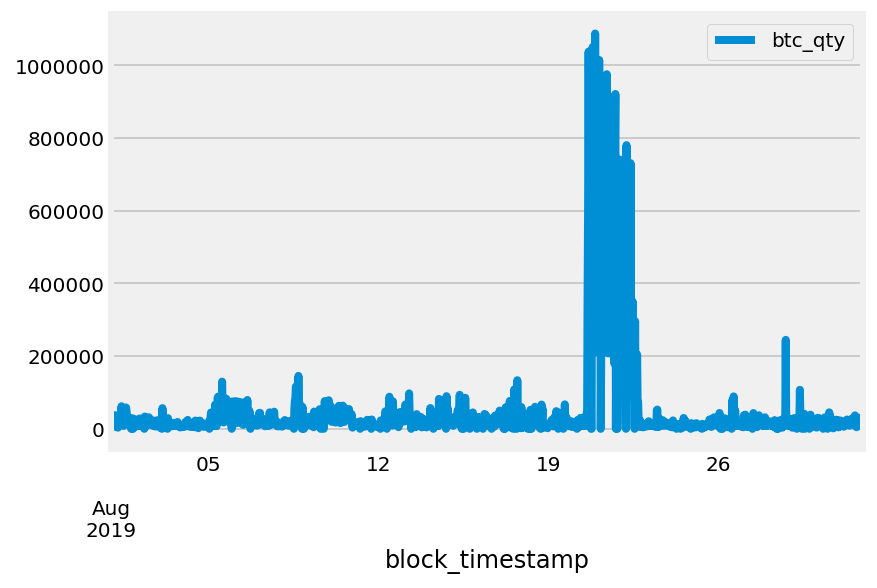

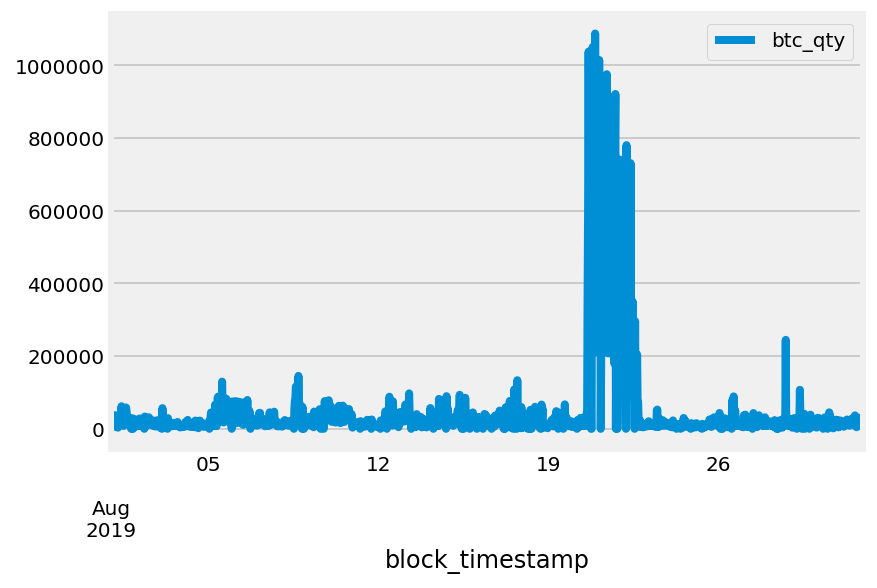

In [224]:
X['predictions'].plot()
y[0:].plot()
y.plot()
plt.vlines(X.index[0],90,120)
plt.show()

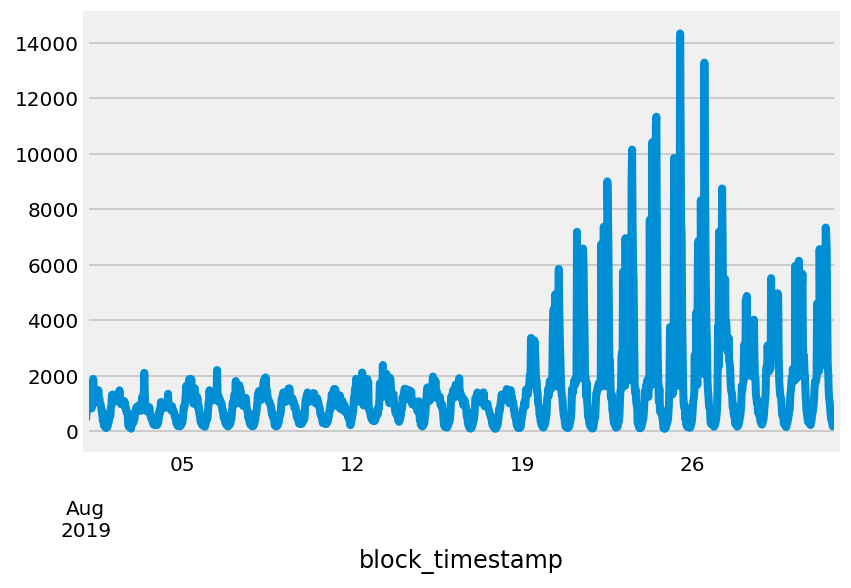

In [225]:
usdt_Aug19['count_tx'].plot()

In [203]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

/Users/riccardoanacar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8547352863288523
-178.88500055815413


In [205]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
print(model.score(Xstd_train_pt, y_train))
print(model.score(Xstd_test_pt, y_test))

/Users/riccardoanacar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


-0.17607175456598934
-50.018386242348775


In [204]:
scores = cross_val_score(model, X_train, y_train, cv=ts)
print(scores)
print(scores.mean())

/Users/riccardoanacar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/riccardoanacar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/riccardoanacar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[-0.19828998 -0.20899897 -0.33163876]
-0.24630923671118335


In [206]:
scores = cross_val_score(model, Xstd_train_pt, y_train, cv=ts)
print(scores)
print(scores.mean())

/Users/riccardoanacar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/riccardoanacar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/riccardoanacar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[-0.26574181 -0.2914665  -0.3460586 ]
-0.3010889676493287


In [209]:
from sklearn.linear_model import ElasticNet

In [221]:
def build_model(_alpha, _l1_ratio):
    estimator = ElasticNet(
        alpha=_alpha,
        l1_ratio=_l1_ratio,
        fit_intercept=True,
        normalize=False,
        precompute=False,
        max_iter=16,
        copy_X=True,
        tol=0.1,
        warm_start=False,
        positive=False,
        random_state=None,
        selection='random'
    )

    return MultiOutputRegressor(estimator, n_jobs=4)

In [222]:
model = build_model(_alpha=1.0, _l1_ratio=0.3)
tscv = TimeSeriesSplit(n_splits=5)
scores = cross_val_score(model, X_train, y_train, cv=ts, scoring=r2)
print("Loss: {0:.3f} (+/- {1:.3f})".format(scores.mean(), scores.std()))

NameError: name 'MultiOutputRegressor' is not defined